# Machine Learning

1. Supervised Learning
    1. Regression (predict value)
    1. **Classification (predict label)**
1. Unsupervised Learning
    1. Clustering 
    1. Dimensionality reduction

---

# Classification
* Step 1: **Training** - Input labeled data to a classification algorithm
* Step 2: **Prediction** - Based on trained algorithm, make a prediction on unseen data

#### Problems in classification

##### Read the Dataset

In [1]:
# Read the digits dataset

from sklearn.datasets import load_digits
digits = load_digits() # load digits dataset (bundled with sklearn for learning / testing purpose)

digits.keys()

# Step 1: 
# Step 2: classification task is to accept unseen data and predict the label 

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [11]:
# use dot notation or [] to access the key
# print(digits['DESCR'])
# digits.data # column(s) for training (attributes / features / inputs - X)
# digits.data.shape
# digits.target # label of a class (label / outcome / output / response - y)

# digits.images.shape
# digits.feature_names # column names of X

In [12]:
print(f'digits.data:\n {digits.data}\n') # numpy array (1797, 64) => 1797 rows, 64 column (pixels) => 1 image in a row (64)
print(f'digits.data.shape:\n {digits.data.shape}\n')

print(f'digits.target:\n {digits.target}') # numpy array
print(f'digits.target.shape:\n {digits.target.shape}') # numpy array

# print(f'digits.images.shape:\n {digits.images.shape}') # numpy array (1797, 8, 8) => images (8x8)

# print(type(digits.images))
# print(digits.feature_names) # feature name / column name

digits.data:
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

digits.data.shape:
 (1797, 64)

digits.target:
 [0 1 2 ... 8 9 8]
digits.target.shape:
 (1797,)


##### Visualize the dataset

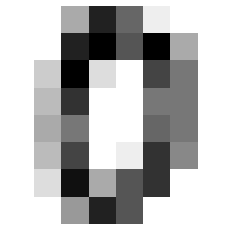

In [13]:
# show single digit
import matplotlib.pyplot as plt

digit_index = 0
dig_img = digits.images[digit_index]
plt.axis('off')
plt.imshow(dig_img, cmap='binary') # imshow - display data as image

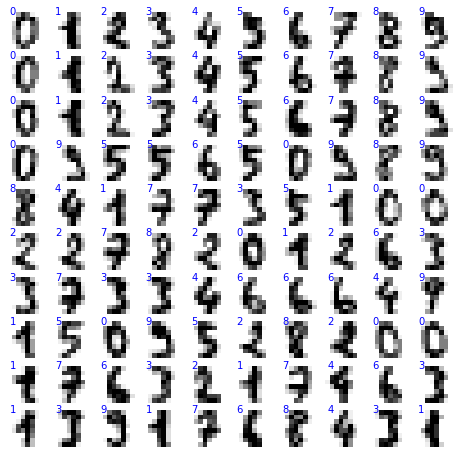

In [14]:
# show first 100 digits
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8,8)) # print first 100 digits

for i, ax in enumerate(axes.flat):
    dig_img = digits.images[i]
    ax.axis('off')
    ax.text(0, 0, digits.target[i], color='blue')
    ax.imshow(dig_img, cmap='binary')

---

### <font color=red>**Don't use ALL DATA for training**</font>

### Split the dataset
* Split the data into **Training set** & **Testing set**
* **Training set** for training
* **Testing set** for performance evaluation

(You may can it train set / test set)

In [15]:
X, y = digits.data, digits.target

In [16]:
# divide the data into TRAINING SET AND TESTING SET
# TRAINING SET is for training / learning / fit
# TESTING SET is for checking the accuracy of prediction

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

##### Candidate 1: **SVC (Linear)**

<img src='SVM.png' width=250> <img src='knn.png' width=250>

<hr>

<img src='svm_error.png' width=800>

<hr>

<img src='svm_kernel.png' width=500>

**Kernel trick for non-linear boundary**
* https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

In [17]:
%%time
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1, random_state=0)
svc.fit(X_train, y_train)  # NOT svc.fit(X, y) - cannot use all data for training

Wall time: 122 ms


SVC(C=1, kernel='linear', random_state=0)

In [18]:
%%time
svc_pred = svc.predict(X_test) # this is slow of large amount of data

Wall time: 7 ms


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, svc_pred) # TEST SET accuracy

0.9844444444444445

In [20]:
from sklearn import metrics
print(metrics.classification_report(y_test, svc_pred))

# support: # of true sample of this class
# precision: tp / (tp + fp) 
# recall: tp / (tp + fn)
# f1-score: 2 * (precision * recall) / (precision + recall) => weighted average of the precision and recall

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        41
           3       0.98      0.98      0.98        52
           4       1.00      1.00      1.00        47
           5       0.95      0.97      0.96        39
           6       1.00      1.00      1.00        43
           7       1.00      0.98      0.99        48
           8       0.95      0.97      0.96        37
           9       0.96      0.94      0.95        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



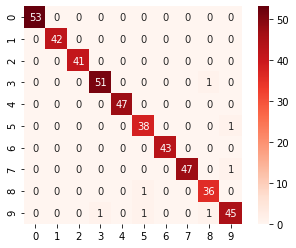

In [21]:
##### Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, svc_pred)

res = sns.heatmap(conf_mat, square=True, annot=True, fmt='d',cmap='Reds')

---

##### **Evaluate multiple classifiers**

<img src='logistic_regression.png' width=520>

 1. KNeighborsClassifier                        0.99333
-------------------------------------------------------
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        42
           2       1.00      0.98      0.99        41
           3       1.00      1.00      1.00        52
           4       1.00      1.00      1.00        47
           5       1.00      0.97      0.99        39
           6       1.00      1.00      1.00        43
           7       0.98      0.98      0.98        48
           8       1.00      1.00      1.00        37
           9       0.96      1.00      0.98        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

 2. SVC                                         0.98444
-------------------------------------------------------
               

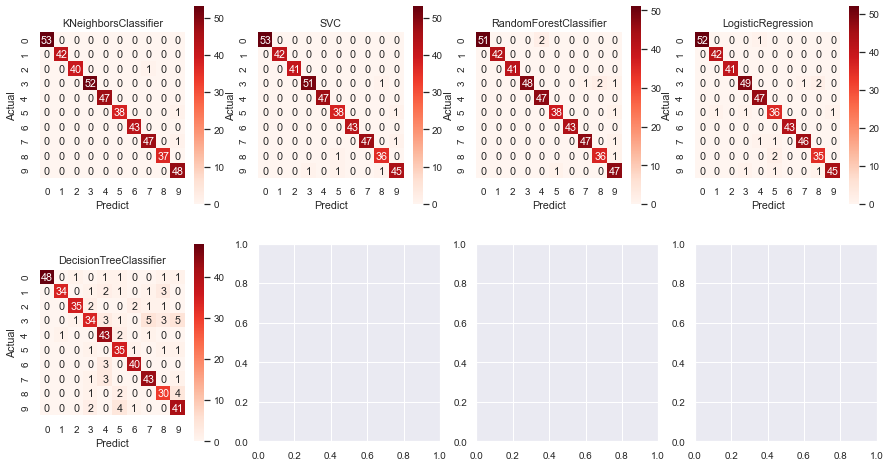

In [22]:
%%time
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression # for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import collections, operator
RunResult = collections.namedtuple('RunResult', 'model pred accuracy clf_report conf_mat')

# try some models
rand_state = 1
model_list = [
             SVC(kernel='linear'),
             KNeighborsClassifier(n_neighbors=5),
             LogisticRegression(max_iter=5000),
             DecisionTreeClassifier(),
             RandomForestClassifier(),
             ]

result_list = []
for model in model_list:
    model.fit(X_train, y_train) # training - fit()
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)  # TEST SET accuracy of this model
    clf_report = metrics.classification_report(y_test, pred)
    conf_mat = confusion_matrix(y_test, pred)
    
    result_list.append(RunResult(model, pred, accuracy, clf_report, conf_mat))

# sort the results by accuracy 
result_list.sort(key=operator.attrgetter('accuracy'), reverse=True)

# figure = plt.figure(figsize=(10, 10))
space=' '
sns.set(font_scale=0.9)

fig, axes = plt.subplots(2, 4, figsize=(15,8))
axes = axes.ravel()
for i, result in enumerate(result_list):
    model_name = type(result.model).__name__
    print(f'{i+1:2}. {model_name:30}              {result.accuracy:6.5f}')
    print('-'*55)
    print(f'  {result.clf_report}')
    sns.heatmap(result.conf_mat, square=True, annot=True, fmt='d', cmap='Reds',\
                ax=axes[i]).set_title(model_name)
    axes[i].set_xlabel('Predict')
    axes[i].set_ylabel('Actual')

# keep the best model
best_model = result_list[0].model

---

##### Cross Validation
* k-fold CV - Randomly split the data into k equal parts and use 1 part as a validation set at a time to check the performance of that run
* Repeat K times to get the average score of runs

In [26]:
# K-fold validation

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=10) 
scores

# scores.mean()

# import sklearn.metrics
# sorted(sklearn.metrics.SCORERS.keys())

array([0.97037037, 0.97037037, 0.97037037, 0.97777778, 0.99259259,
       0.99259259, 0.98518519, 0.98507463, 0.99253731, 0.99253731])

In [27]:
from sklearn.model_selection import cross_validate
knn = KNeighborsClassifier()

cv_results = cross_validate(knn, X_train, y_train, scoring='accuracy', cv=10)

print(cv_results.keys())
print('Fit time:' + str(cv_results['fit_time']))  # fit time of each split 
print('Score time:' + str(cv_results['score_time'])) # score time of each split
print('Accuracy: ' + str(cv_results['test_score'])) # score of each split

dict_keys(['fit_time', 'score_time', 'test_score'])
Fit time:[0.01400352 0.01400328 0.01300335 0.01300335 0.01400304 0.01300263
 0.01400328 0.01300263 0.01300359 0.01300287]
Score time:[0.01500273 0.01400304 0.01400232 0.01400304 0.01400352 0.01500297
 0.01400352 0.01400328 0.01400232 0.01400328]
Accuracy: [0.97037037 0.97037037 0.97037037 0.97777778 0.99259259 0.99259259
 0.98518519 0.98507463 0.99253731 0.99253731]


---

### Hyperparameters tuning
* there are many combinations
* use cross validation
* it could be slow!

**GridSearchCV**

In [28]:
# KNeighborsClassifier(n_neighbors=3)
from sklearn.model_selection import GridSearchCV
params = [
    {'n_neighbors':range(2,21),
     'weights':['uniform','distance'],},  # 19*2=38 combinations
]

# weights: weight function used in prediction
# Possible values: ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
#                  ‘distance’ : weight points by the inverse of their distance 

clf = KNeighborsClassifier()
search_cv = GridSearchCV(clf, params, cv=5, scoring='accuracy', return_train_score=True)
search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': range(2, 21),
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [29]:
search_cv.best_estimator_

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [30]:
print("GridSearchCV results:\n")
for i, (mean, params) in enumerate(zip(search_cv.cv_results_['mean_test_score'], search_cv.cv_results_['params'])):
    if search_cv.best_score_ == mean:
        print(f' {i+1:2} * {mean:10.5f}, {params}')
    else:
        print(f' {i+1:2}   {mean:10.5f}, {params}')    

GridSearchCV results:

  1      0.97848, {'n_neighbors': 2, 'weights': 'uniform'}
  2 *    0.98442, {'n_neighbors': 2, 'weights': 'distance'}
  3      0.98294, {'n_neighbors': 3, 'weights': 'uniform'}
  4      0.98368, {'n_neighbors': 3, 'weights': 'distance'}
  5      0.98071, {'n_neighbors': 4, 'weights': 'uniform'}
  6      0.98368, {'n_neighbors': 4, 'weights': 'distance'}
  7      0.98145, {'n_neighbors': 5, 'weights': 'uniform'}
  8      0.98294, {'n_neighbors': 5, 'weights': 'distance'}
  9      0.97700, {'n_neighbors': 6, 'weights': 'uniform'}
 10      0.98220, {'n_neighbors': 6, 'weights': 'distance'}
 11      0.97700, {'n_neighbors': 7, 'weights': 'uniform'}
 12      0.97922, {'n_neighbors': 7, 'weights': 'distance'}
 13      0.97774, {'n_neighbors': 8, 'weights': 'uniform'}
 14      0.97922, {'n_neighbors': 8, 'weights': 'distance'}
 15      0.97551, {'n_neighbors': 9, 'weights': 'uniform'}
 16      0.97699, {'n_neighbors': 9, 'weights': 'distance'}
 17      0.97402, {'n_nei

**GridSearchCV (another example)**

In [31]:
# another example

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = [
    {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'] }, # which kernel perform better (with default hyperparams)
]

model = SVC()

search_cv = GridSearchCV(model, params, cv=5, scoring='accuracy', return_train_score=True)
search_cv.fit(X_train, y_train)

# print scores of each param
print("GridSearchCV results:\n")
for i, (mean, params) in enumerate(zip(search_cv.cv_results_['mean_test_score'], search_cv.cv_results_['params'])):
    if search_cv.best_score_ == mean:
        print(f' {i+1:2} * {mean:10.5f}, {params}')
    else:
        print(f' {i+1:2}   {mean:10.5f}, {params}')    

GridSearchCV results:

  1      0.97700, {'kernel': 'linear'}
  2      0.98441, {'kernel': 'rbf'}
  3 *    0.98739, {'kernel': 'poly'}
  4      0.91019, {'kernel': 'sigmoid'}


**RandomizedSearchCV**

In [35]:
from sklearn.model_selection import RandomizedSearchCV
params = [
    {'n_neighbors':range(2,21), 
     'weights':['uniform','distance'],},  # ? combinations
]

clf = KNeighborsClassifier()
# n_iter -> just randomly pick n combinations for evaluation! (default = 10)
search_rand = RandomizedSearchCV(clf, params, cv=5, n_iter=10, scoring='accuracy', return_train_score=True)
search_rand.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': range(2, 21),
                                         'weights': ['uniform', 'distance']}],
                   return_train_score=True, scoring='accuracy')

In [36]:
search_rand.best_estimator_

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [37]:
print("RandomizeSearchCV results:\n")
for i, (mean, params) in enumerate(zip(search_rand.cv_results_['mean_test_score'], search_rand.cv_results_['params'])):
    if search_rand.best_score_ == mean:
        print(f' {i+1:2} * {mean:10.5f}, {params}')
    else:
        print(f' {i+1:2}   {mean:10.5f}, {params}')    

RandomizeSearchCV results:

  1      0.98368, {'weights': 'distance', 'n_neighbors': 3}
  2      0.97922, {'weights': 'distance', 'n_neighbors': 7}
  3      0.98368, {'weights': 'distance', 'n_neighbors': 4}
  4      0.96215, {'weights': 'uniform', 'n_neighbors': 16}
  5 *    0.98442, {'weights': 'distance', 'n_neighbors': 2}
  6      0.97031, {'weights': 'uniform', 'n_neighbors': 11}
  7      0.97700, {'weights': 'uniform', 'n_neighbors': 7}
  8      0.96438, {'weights': 'distance', 'n_neighbors': 18}
  9      0.97551, {'weights': 'uniform', 'n_neighbors': 9}
 10      0.97625, {'weights': 'distance', 'n_neighbors': 10}
